# Regression(Boston data with evaluation metrics and regularization)

[document](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np

# To show the numeric type well
np.set_printoptions(suppress=True)

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**About Columns**

Number of attributes: 13

* **CRIM**: crime rate
* **ZN**: Percentage of residential land per 25,000 square feet
* **INDUS**: Percentage of non-retail business area
* **CHAS**: Charles River Dummy Variable (1 if the passage is towards the river; 0 otherwise)
* **NOX**: Nitric oxide concentration (parts per million)
* **RM**: Average number of rooms per dwelling
* **AGE**: Percentage of Self-Owned Occupancy Built Before 1940
* **DIS**: Weighted distance to 5 Boston job centers
* **RAD**: Highway Accessibility Index
* **TAX**: Full value property tax rate per $10,000
* **PTRATIO** Student-Teacher Ratio by City
* **B**: 1000 (Bk-0.63)^2 where Bk is the percentage of tests per city
* **LSTAT**: low status of the population
* **MEDV**: Median home value (in USD 1,000)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [10]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [11]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21


In [12]:
y_train.head()

493    21.8
4      36.2
120    22.0
358    22.7
97     38.7
Name: MEDV, dtype: float64

## Create evaluation metrics

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

Average of the **squares** of the difference between the predicted value and the actual value

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

Average of the **absolute value** of the difference between the predicted value and the actual value

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


A value obtained by averaging the **square** of the difference between the predicted value and the actual value and then covering the **root**

In [13]:
import numpy as np

In [14]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [15]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [16]:
my_mse(pred, actual)

4.0

In [17]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [18]:
my_mae(pred, actual)

2.0

In [19]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [20]:
my_rmse(pred, actual)

2.0

## Using sklearn's evaluation indicators

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [23]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### Functions to check the performance of each model

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[document](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [25]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression(n_jobs = -1)

* n_jobs: use CPU core

In [33]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [34]:
pred = model.predict(x_test)

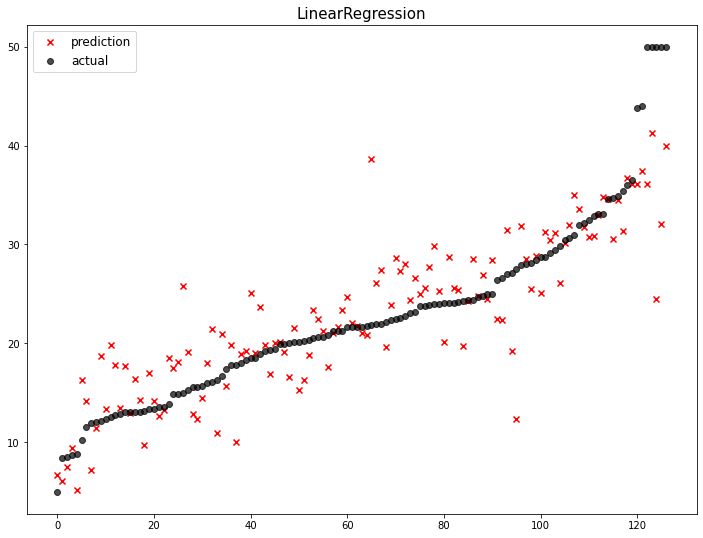

              model        mse
0  LinearRegression  25.817813


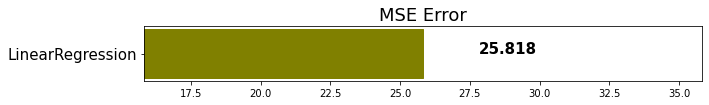

In [35]:
mse_eval('LinearRegression', pred, y_test)

## Regularization

Giving some kind of **penalty** to prevent learning from overfitting

**L2 Regularization**

* Multiply the sum of squares of each weight by the Regularization Strength λ.
* Increasing λ will decrease the weight more (regulation is important), while decreasing λ will increase the weight (regulation is not important).

**L1 Regularization**

* Not the sum of squares of weights, but the addition of **sum of weights** multiplied by the regularization strength λ and added to the error.
* Any weight w is actually zero. That is, there is a characteristic that is completely excluded from the model.


**L2 regulation is more stable than L1 regulation, so L2 regulation is generally used more**

**Ridge - L2 regularization**

$Error=MSE+αw^2$ 

**Lasso - L1 regularization**  

$Error=MSE+α|w|$

### Ridge

In [30]:
from sklearn.linear_model import Ridge

In [31]:
# The larger the value, the greater the regulation.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

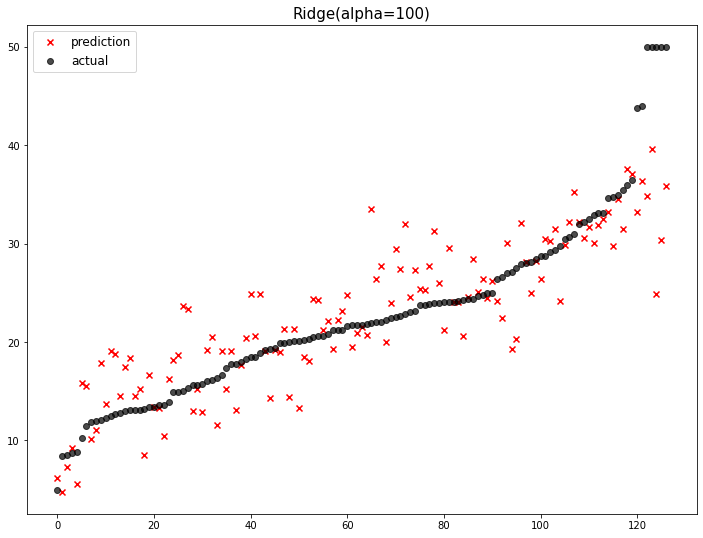

              model        mse
0  Ridge(alpha=100)  26.476653
1  LinearRegression  25.817813


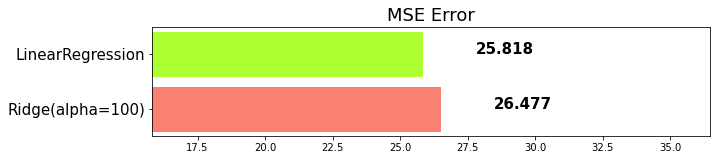

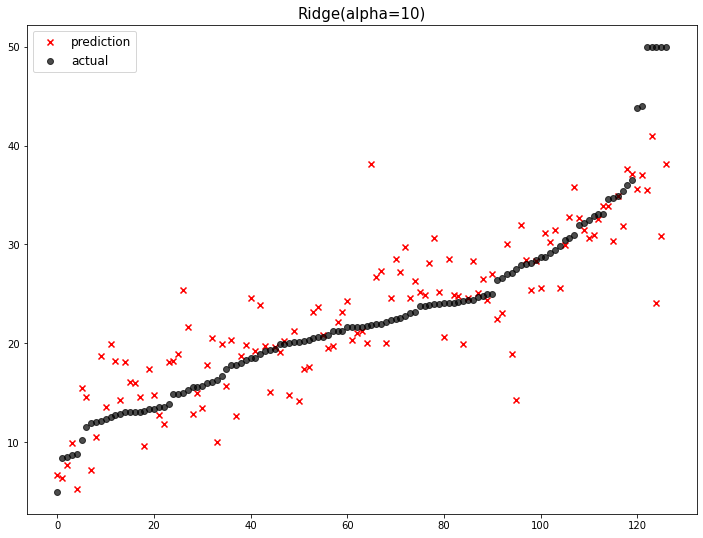

              model        mse
0   Ridge(alpha=10)  26.775513
1  Ridge(alpha=100)  26.476653
2  LinearRegression  25.817813


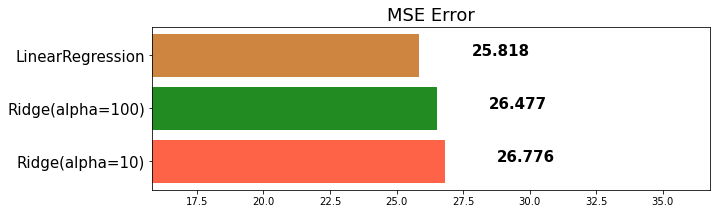

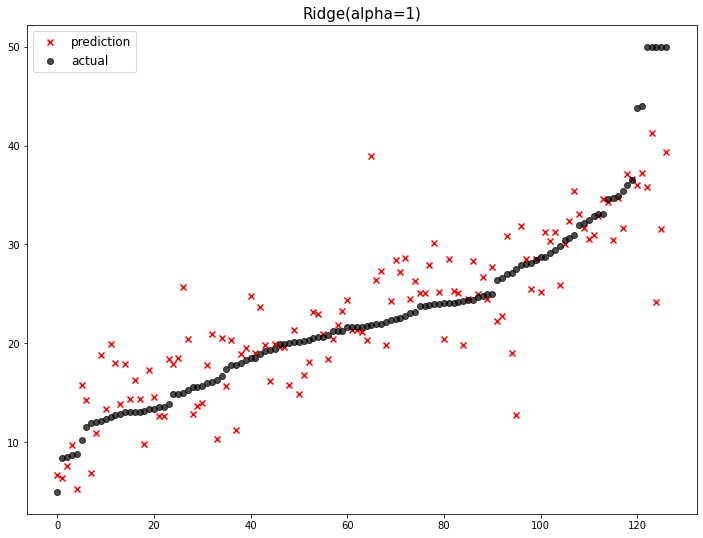

              model        mse
0   Ridge(alpha=10)  26.775513
1  Ridge(alpha=100)  26.476653
2    Ridge(alpha=1)  26.307971
3  LinearRegression  25.817813


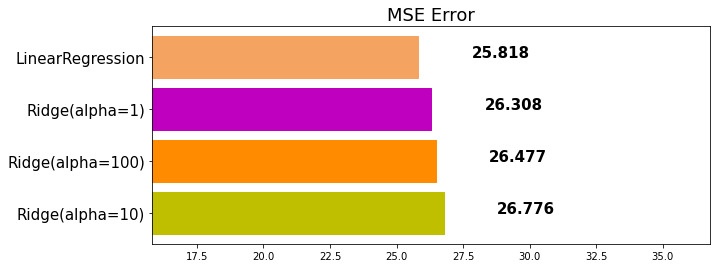

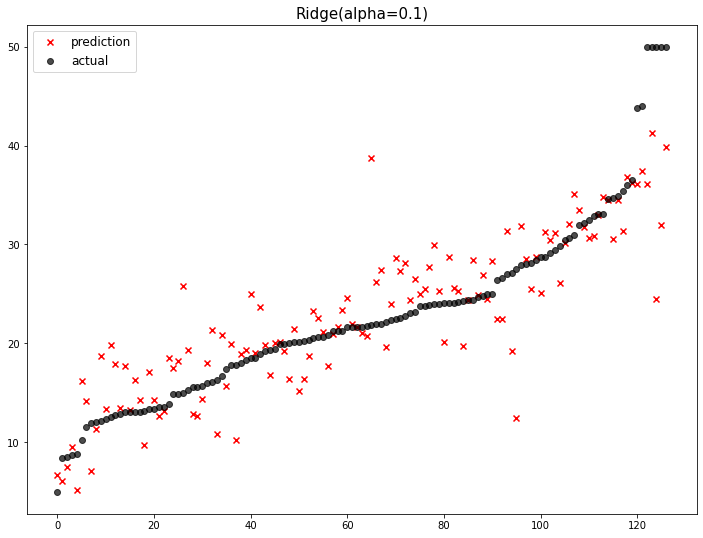

              model        mse
0   Ridge(alpha=10)  26.775513
1  Ridge(alpha=100)  26.476653
2    Ridge(alpha=1)  26.307971
3  Ridge(alpha=0.1)  25.882311
4  LinearRegression  25.817813


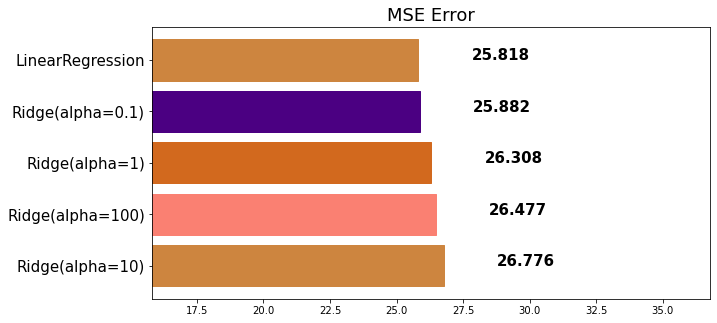

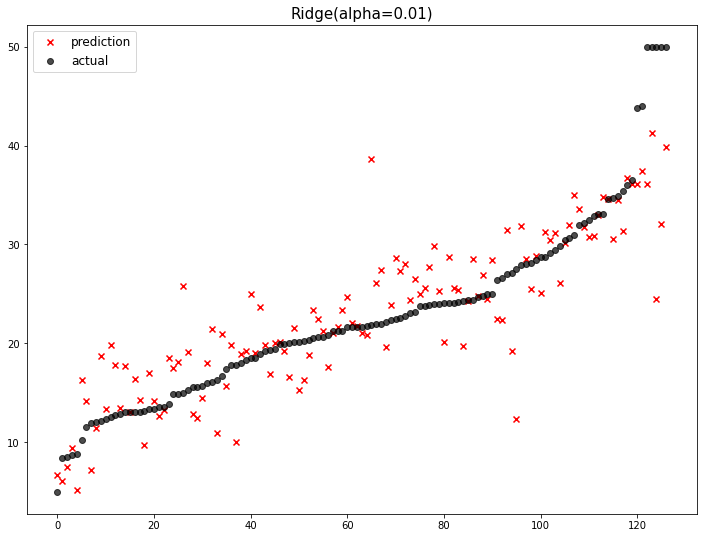

               model        mse
0    Ridge(alpha=10)  26.775513
1   Ridge(alpha=100)  26.476653
2     Ridge(alpha=1)  26.307971
3   Ridge(alpha=0.1)  25.882311
4  Ridge(alpha=0.01)  25.824345
5   LinearRegression  25.817813


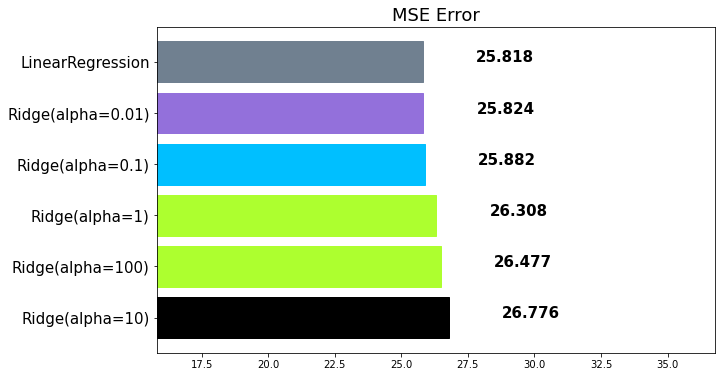

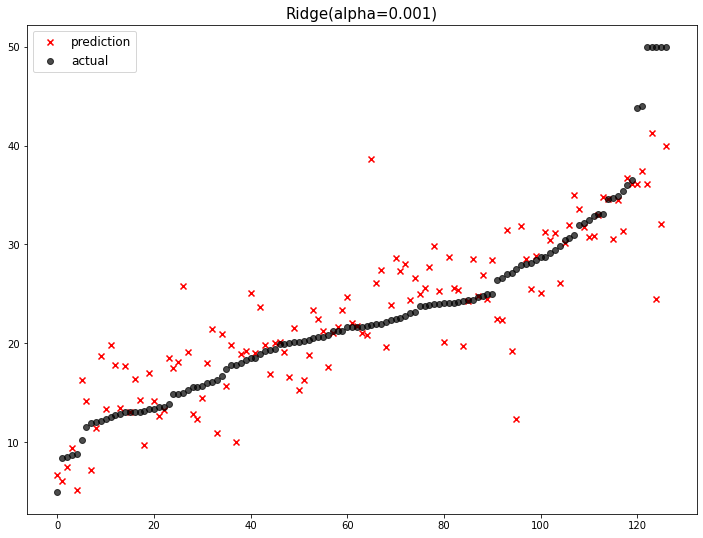

                model        mse
0     Ridge(alpha=10)  26.775513
1    Ridge(alpha=100)  26.476653
2      Ridge(alpha=1)  26.307971
3    Ridge(alpha=0.1)  25.882311
4   Ridge(alpha=0.01)  25.824345
5  Ridge(alpha=0.001)  25.818467
6    LinearRegression  25.817813


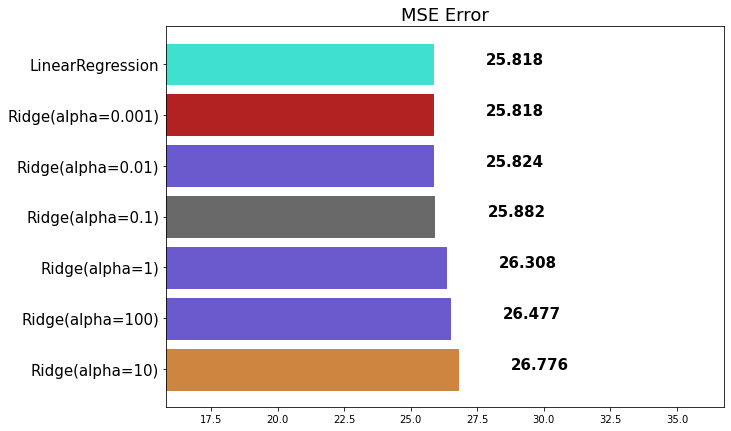

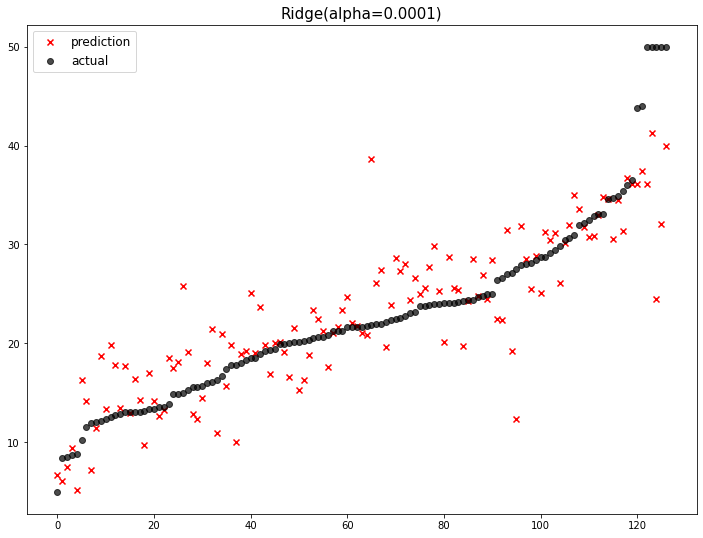

                 model        mse
0      Ridge(alpha=10)  26.775513
1     Ridge(alpha=100)  26.476653
2       Ridge(alpha=1)  26.307971
3     Ridge(alpha=0.1)  25.882311
4    Ridge(alpha=0.01)  25.824345
5   Ridge(alpha=0.001)  25.818467
6  Ridge(alpha=0.0001)  25.817878
7     LinearRegression  25.817813


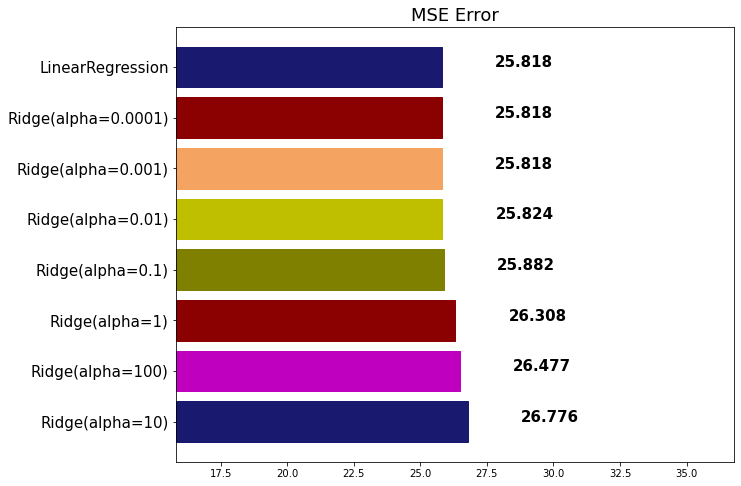

In [36]:
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [38]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
ridge.coef_

array([ -0.12437217,   0.043921  ,  -0.02919101,   2.56563445,
       -15.77155659,   4.43365161,  -0.01219844,  -1.57385887,
         0.30938265,  -0.01215097,  -0.88381517,   0.00965481,
        -0.45669038])

In [39]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

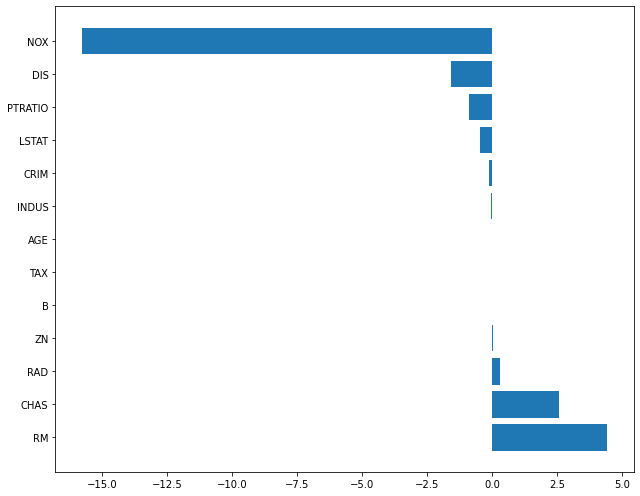

In [40]:
plot_coef(x_train.columns, ridge.coef_)

In [41]:
ridge_100 = Ridge(alpha = 100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha = 0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

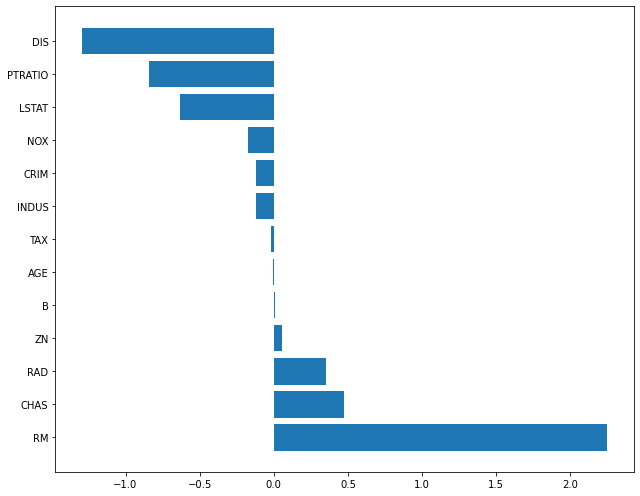

In [42]:
plot_coef(x_train.columns, ridge_100.coef_)

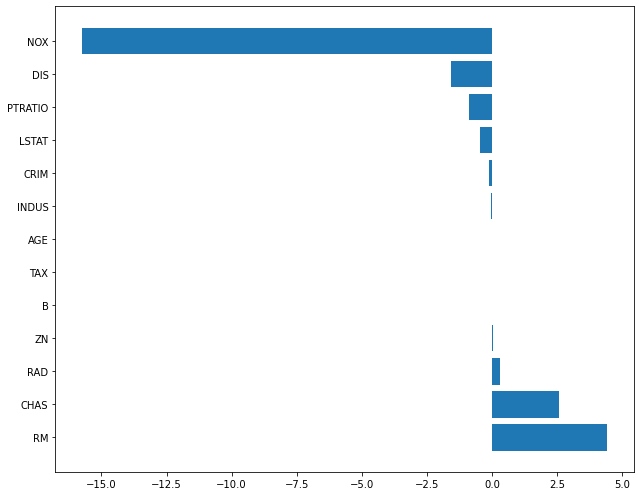

In [43]:
plot_coef(x_train.columns, ridge_001.coef_)

In [44]:
from sklearn.linear_model import Lasso

In [45]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

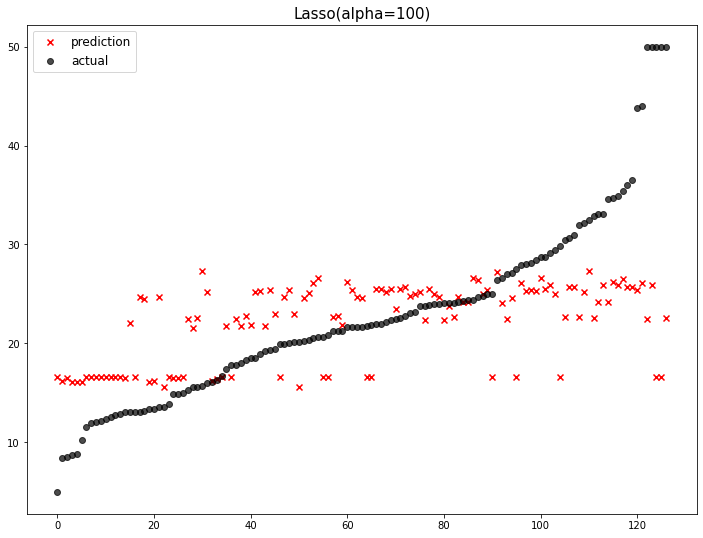

                 model        mse
0     Lasso(alpha=100)  67.992572
1      Ridge(alpha=10)  26.775513
2     Ridge(alpha=100)  26.476653
3       Ridge(alpha=1)  26.307971
4     Ridge(alpha=0.1)  25.882311
5    Ridge(alpha=0.01)  25.824345
6   Ridge(alpha=0.001)  25.818467
7  Ridge(alpha=0.0001)  25.817878
8     LinearRegression  25.817813


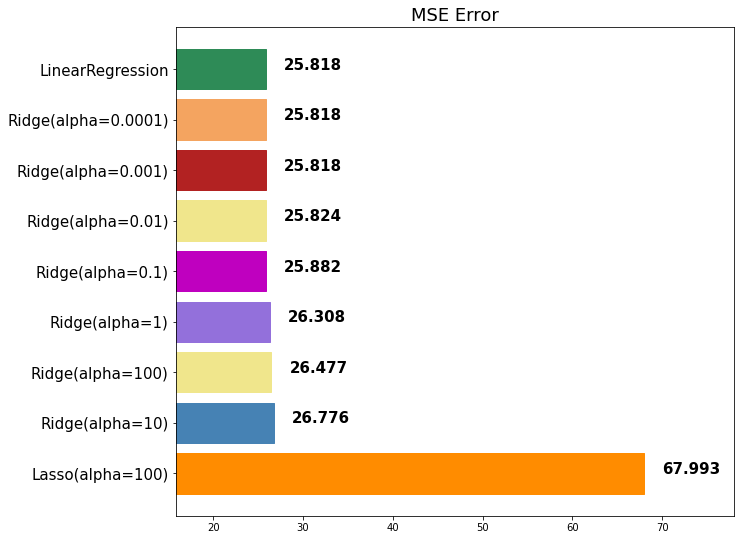

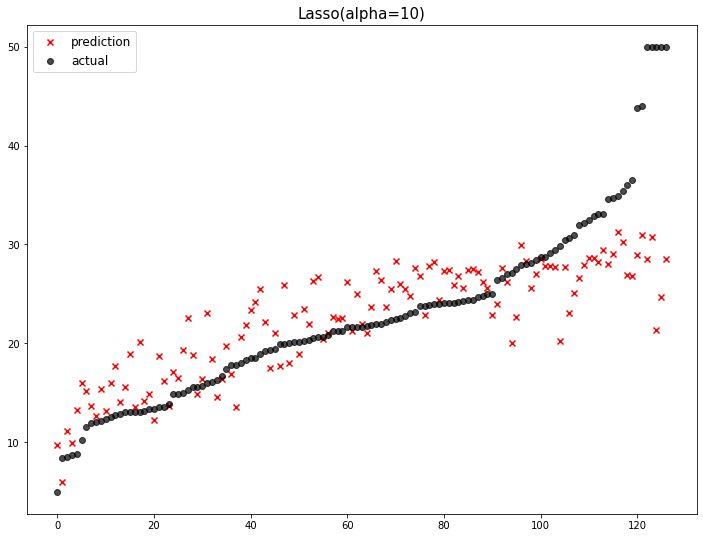

                 model        mse
0     Lasso(alpha=100)  67.992572
1      Lasso(alpha=10)  38.306399
2      Ridge(alpha=10)  26.775513
3     Ridge(alpha=100)  26.476653
4       Ridge(alpha=1)  26.307971
5     Ridge(alpha=0.1)  25.882311
6    Ridge(alpha=0.01)  25.824345
7   Ridge(alpha=0.001)  25.818467
8  Ridge(alpha=0.0001)  25.817878
9     LinearRegression  25.817813


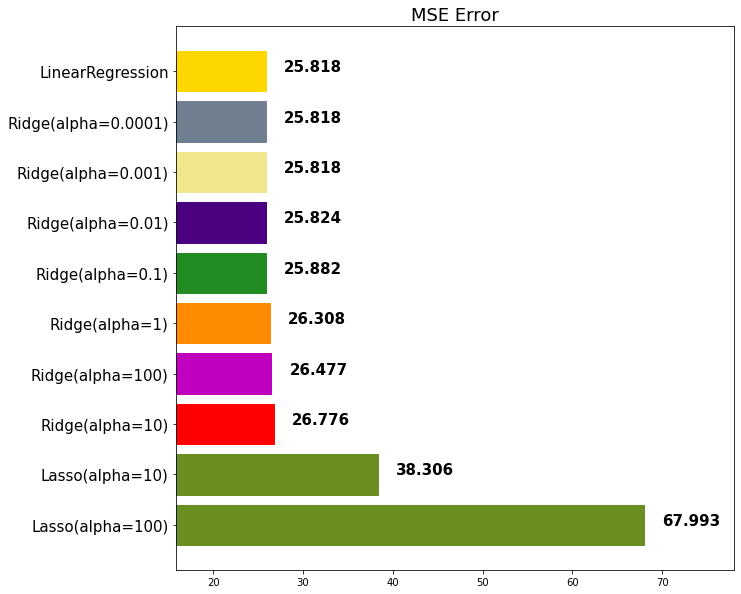

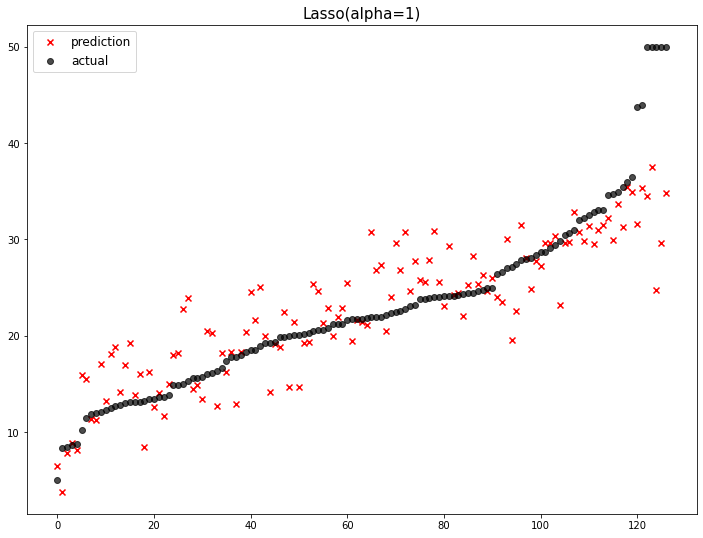

                  model        mse
0      Lasso(alpha=100)  67.992572
1       Lasso(alpha=10)  38.306399
2       Ridge(alpha=10)  26.775513
3      Ridge(alpha=100)  26.476653
4        Lasso(alpha=1)  26.318104
5        Ridge(alpha=1)  26.307971
6      Ridge(alpha=0.1)  25.882311
7     Ridge(alpha=0.01)  25.824345
8    Ridge(alpha=0.001)  25.818467
9   Ridge(alpha=0.0001)  25.817878
10     LinearRegression  25.817813


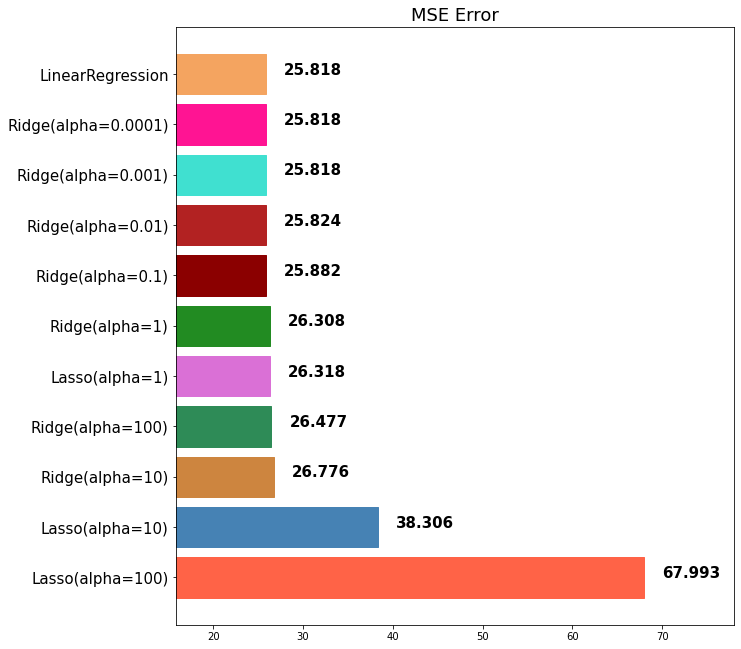

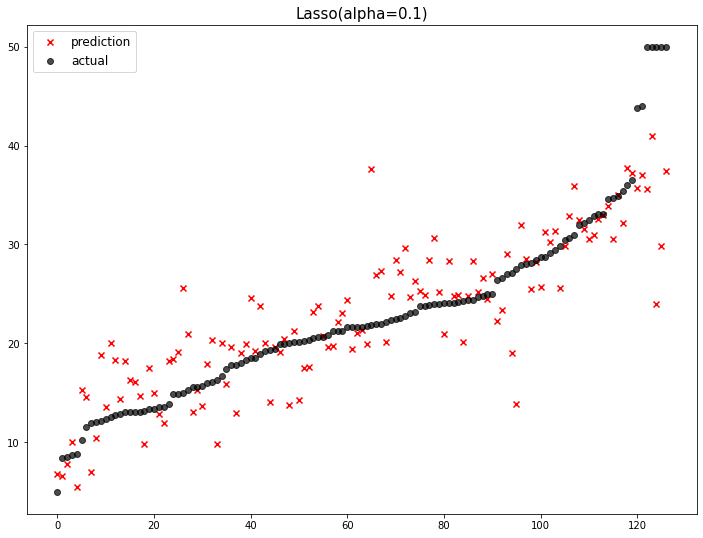

                  model        mse
0      Lasso(alpha=100)  67.992572
1       Lasso(alpha=10)  38.306399
2      Lasso(alpha=0.1)  27.228867
3       Ridge(alpha=10)  26.775513
4      Ridge(alpha=100)  26.476653
5        Lasso(alpha=1)  26.318104
6        Ridge(alpha=1)  26.307971
7      Ridge(alpha=0.1)  25.882311
8     Ridge(alpha=0.01)  25.824345
9    Ridge(alpha=0.001)  25.818467
10  Ridge(alpha=0.0001)  25.817878
11     LinearRegression  25.817813


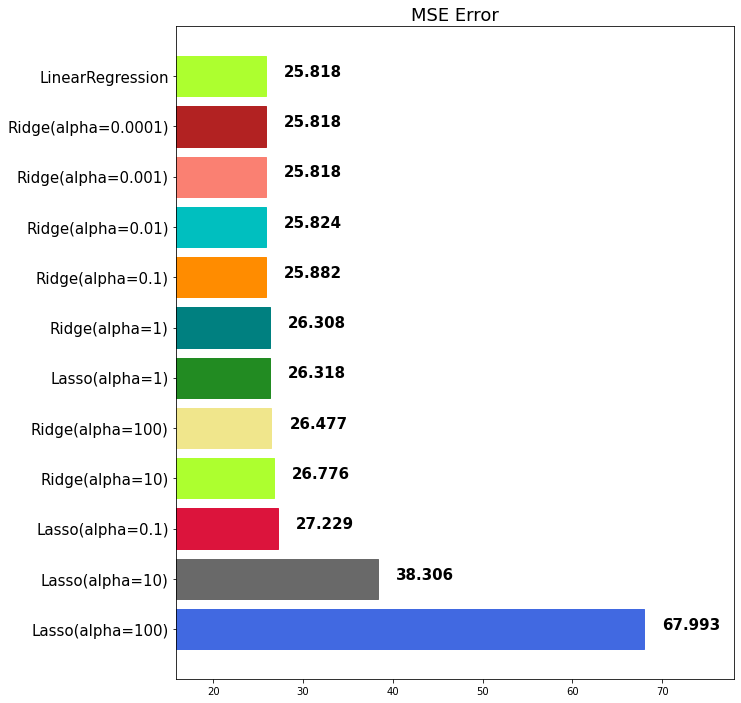

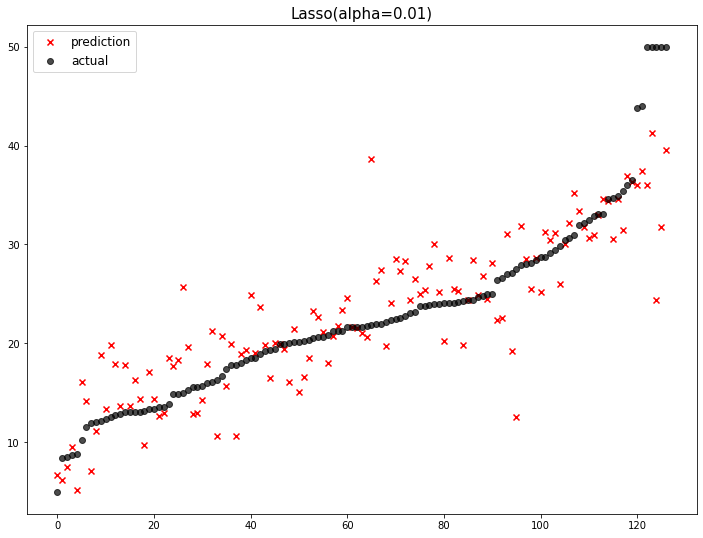

                  model        mse
0      Lasso(alpha=100)  67.992572
1       Lasso(alpha=10)  38.306399
2      Lasso(alpha=0.1)  27.228867
3       Ridge(alpha=10)  26.775513
4      Ridge(alpha=100)  26.476653
5        Lasso(alpha=1)  26.318104
6        Ridge(alpha=1)  26.307971
7     Lasso(alpha=0.01)  25.984630
8      Ridge(alpha=0.1)  25.882311
9     Ridge(alpha=0.01)  25.824345
10   Ridge(alpha=0.001)  25.818467
11  Ridge(alpha=0.0001)  25.817878
12     LinearRegression  25.817813


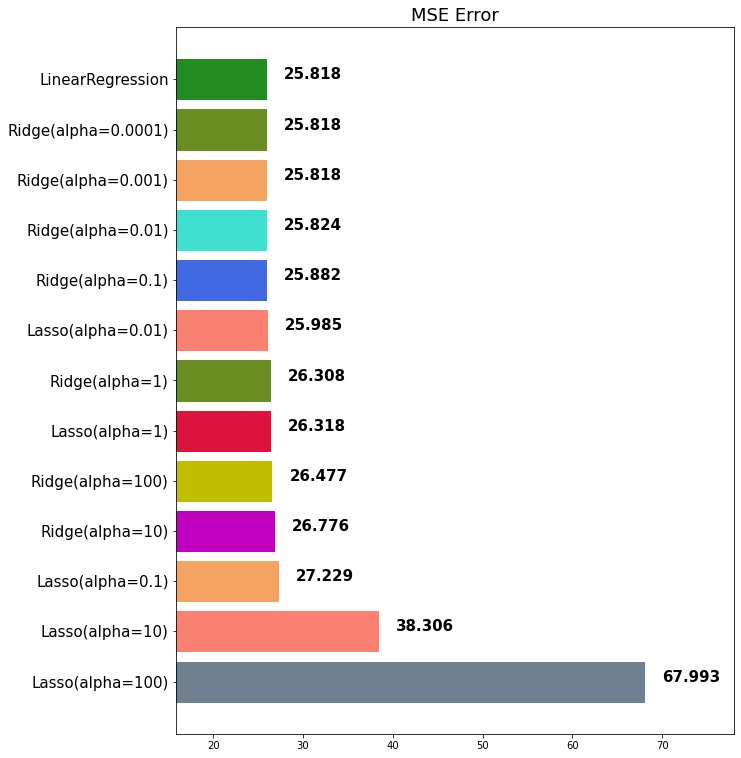

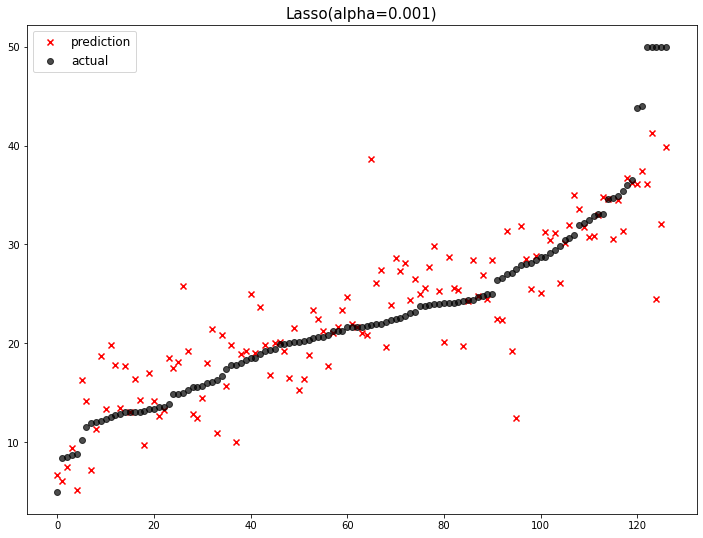

                  model        mse
0      Lasso(alpha=100)  67.992572
1       Lasso(alpha=10)  38.306399
2      Lasso(alpha=0.1)  27.228867
3       Ridge(alpha=10)  26.775513
4      Ridge(alpha=100)  26.476653
5        Lasso(alpha=1)  26.318104
6        Ridge(alpha=1)  26.307971
7     Lasso(alpha=0.01)  25.984630
8      Ridge(alpha=0.1)  25.882311
9    Lasso(alpha=0.001)  25.831237
10    Ridge(alpha=0.01)  25.824345
11   Ridge(alpha=0.001)  25.818467
12  Ridge(alpha=0.0001)  25.817878
13     LinearRegression  25.817813


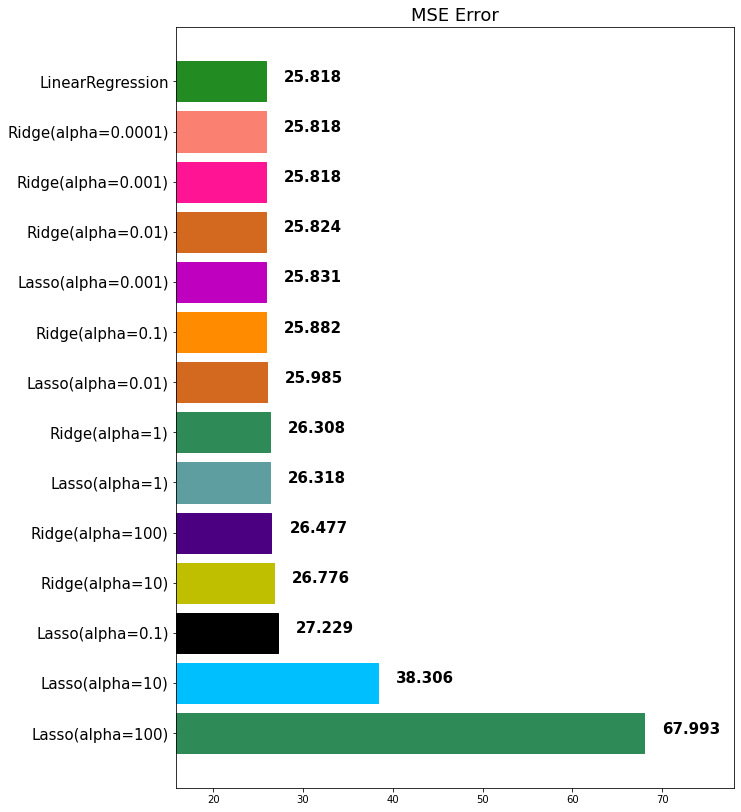

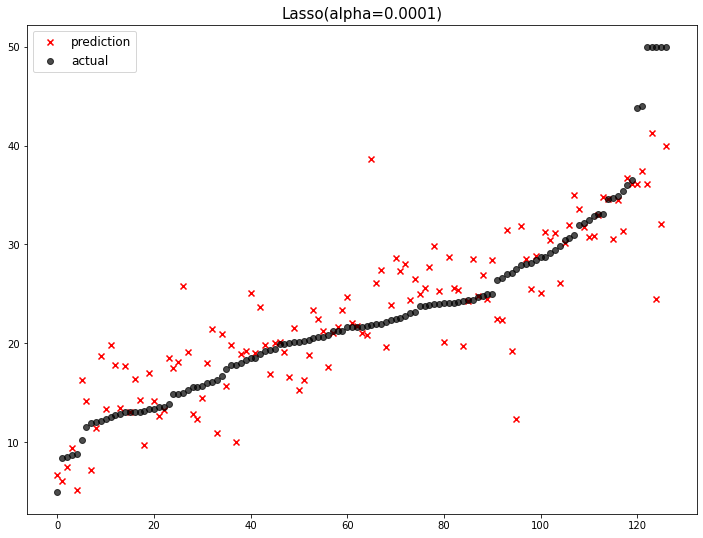

                  model        mse
0      Lasso(alpha=100)  67.992572
1       Lasso(alpha=10)  38.306399
2      Lasso(alpha=0.1)  27.228867
3       Ridge(alpha=10)  26.775513
4      Ridge(alpha=100)  26.476653
5        Lasso(alpha=1)  26.318104
6        Ridge(alpha=1)  26.307971
7     Lasso(alpha=0.01)  25.984630
8      Ridge(alpha=0.1)  25.882311
9    Lasso(alpha=0.001)  25.831237
10    Ridge(alpha=0.01)  25.824345
11  Lasso(alpha=0.0001)  25.819123
12   Ridge(alpha=0.001)  25.818467
13  Ridge(alpha=0.0001)  25.817878
14     LinearRegression  25.817813


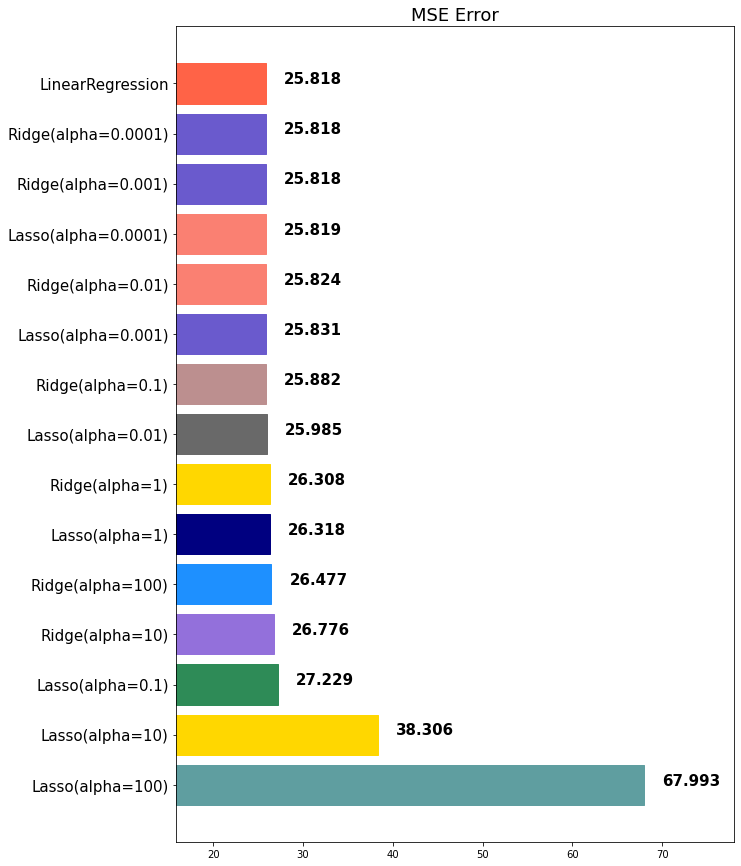

In [46]:
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [47]:
lasso_100 = Lasso(alpha = 100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha = 0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

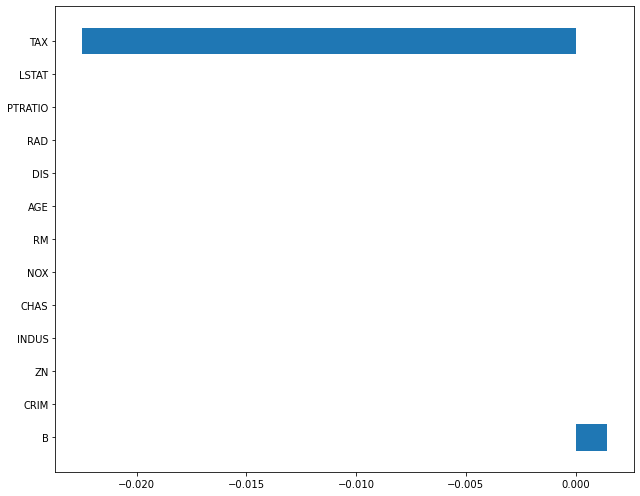

In [48]:
plot_coef(x_train.columns, lasso_100.coef_)

In [49]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.02249985,
       -0.        ,  0.00144425, -0.        ])

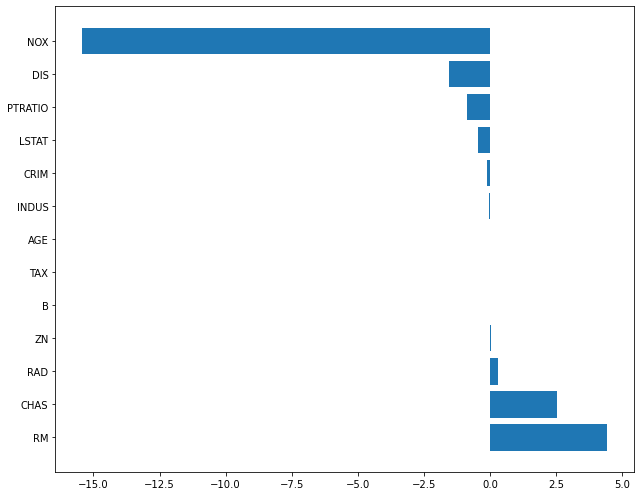

In [50]:
plot_coef(x_train.columns, lasso_001.coef_)

In [ ]:
lasso_001.coef_

array([ -0.12917321,   0.06504872,   0.00512375,   2.6515016 ,
       -18.61205761,   2.98149349,   0.00016926,  -1.71181198,
         0.31973993,  -0.01452793,  -0.8523832 ,   0.00733997,
        -0.53417737])

### ElasticNet

**l1_ratio (default=0.5)**

* l1_ratio = 0 (only L2 regulation is used).
* l1_ratio = 1 (only L1 regulation is used).
* 0 < l1_ratio < 1 (mixed use of L1 and L2 regulations)

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
ratios = [0.2, 0.5, 0.8]

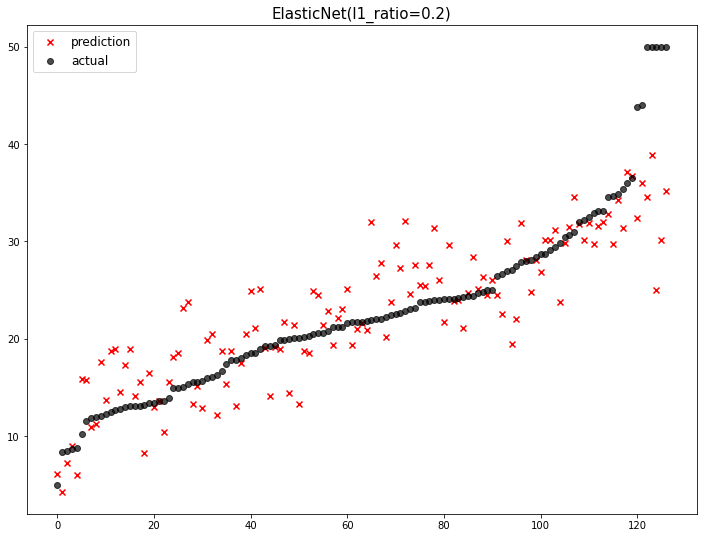

                       model        mse
0           Lasso(alpha=100)  67.992572
1            Lasso(alpha=10)  38.306399
2           Lasso(alpha=0.1)  27.228867
3            Ridge(alpha=10)  26.775513
4   ElasticNet(l1_ratio=0.2)  26.630630
5           Ridge(alpha=100)  26.476653
6             Lasso(alpha=1)  26.318104
7             Ridge(alpha=1)  26.307971
8          Lasso(alpha=0.01)  25.984630
9           Ridge(alpha=0.1)  25.882311
10        Lasso(alpha=0.001)  25.831237
11         Ridge(alpha=0.01)  25.824345
12       Lasso(alpha=0.0001)  25.819123
13        Ridge(alpha=0.001)  25.818467
14       Ridge(alpha=0.0001)  25.817878
15          LinearRegression  25.817813


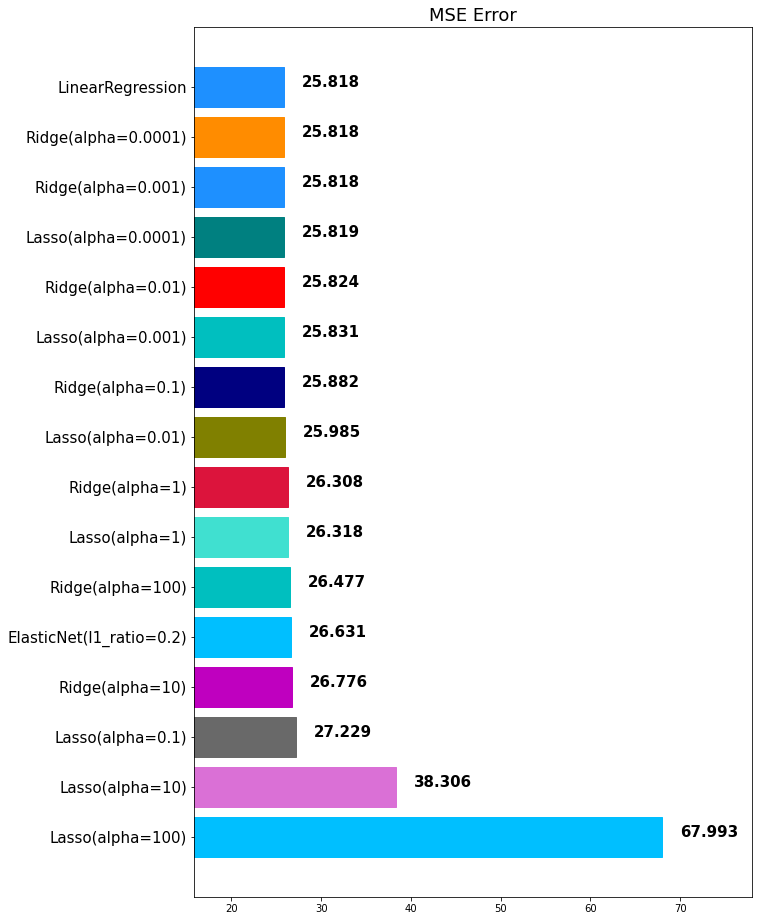

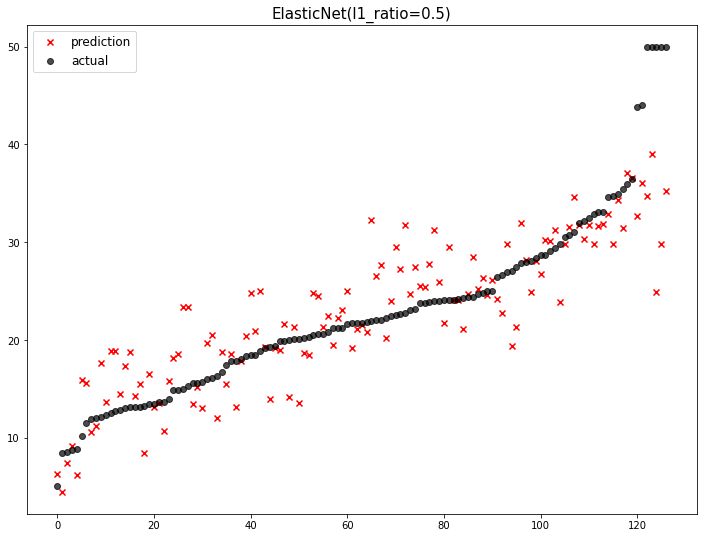

                       model        mse
0           Lasso(alpha=100)  67.992572
1            Lasso(alpha=10)  38.306399
2           Lasso(alpha=0.1)  27.228867
3            Ridge(alpha=10)  26.775513
4   ElasticNet(l1_ratio=0.2)  26.630630
5           Ridge(alpha=100)  26.476653
6   ElasticNet(l1_ratio=0.5)  26.473066
7             Lasso(alpha=1)  26.318104
8             Ridge(alpha=1)  26.307971
9          Lasso(alpha=0.01)  25.984630
10          Ridge(alpha=0.1)  25.882311
11        Lasso(alpha=0.001)  25.831237
12         Ridge(alpha=0.01)  25.824345
13       Lasso(alpha=0.0001)  25.819123
14        Ridge(alpha=0.001)  25.818467
15       Ridge(alpha=0.0001)  25.817878
16          LinearRegression  25.817813


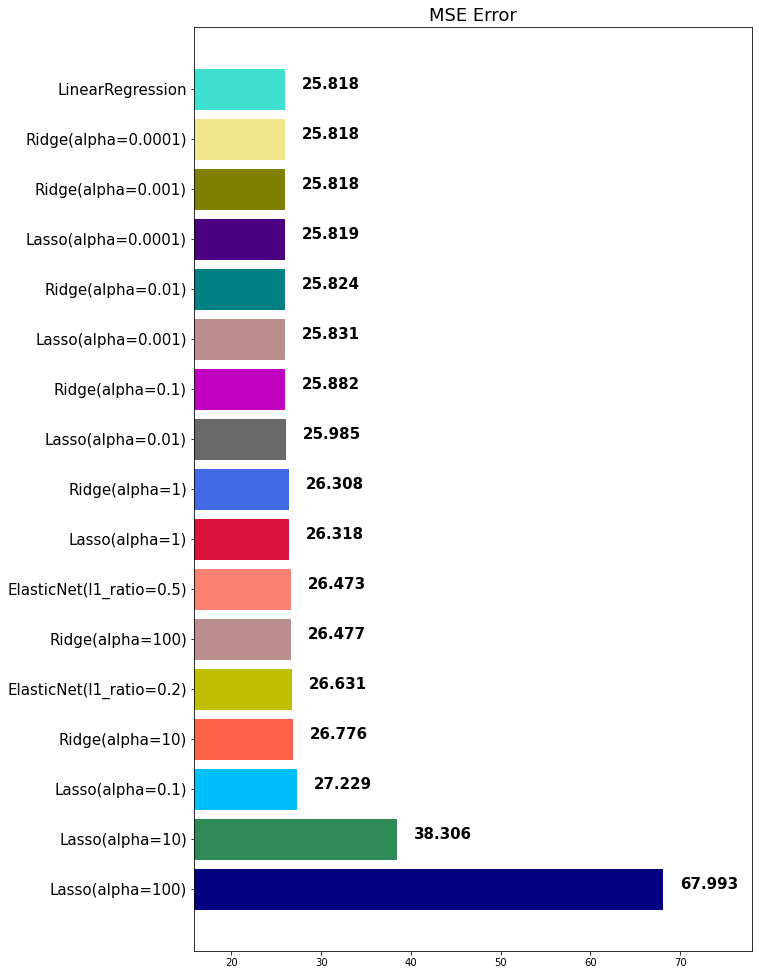

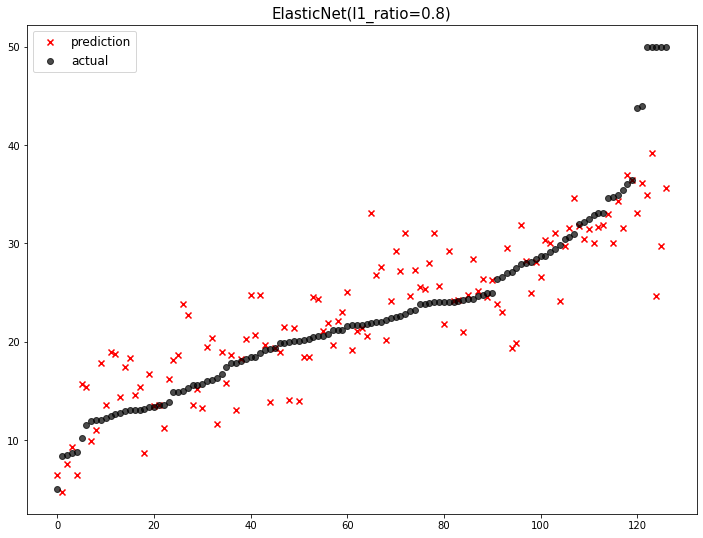

                       model        mse
0           Lasso(alpha=100)  67.992572
1            Lasso(alpha=10)  38.306399
2           Lasso(alpha=0.1)  27.228867
3            Ridge(alpha=10)  26.775513
4   ElasticNet(l1_ratio=0.2)  26.630630
5           Ridge(alpha=100)  26.476653
6   ElasticNet(l1_ratio=0.5)  26.473066
7             Lasso(alpha=1)  26.318104
8             Ridge(alpha=1)  26.307971
9   ElasticNet(l1_ratio=0.8)  26.212880
10         Lasso(alpha=0.01)  25.984630
11          Ridge(alpha=0.1)  25.882311
12        Lasso(alpha=0.001)  25.831237
13         Ridge(alpha=0.01)  25.824345
14       Lasso(alpha=0.0001)  25.819123
15        Ridge(alpha=0.001)  25.818467
16       Ridge(alpha=0.0001)  25.817878
17          LinearRegression  25.817813


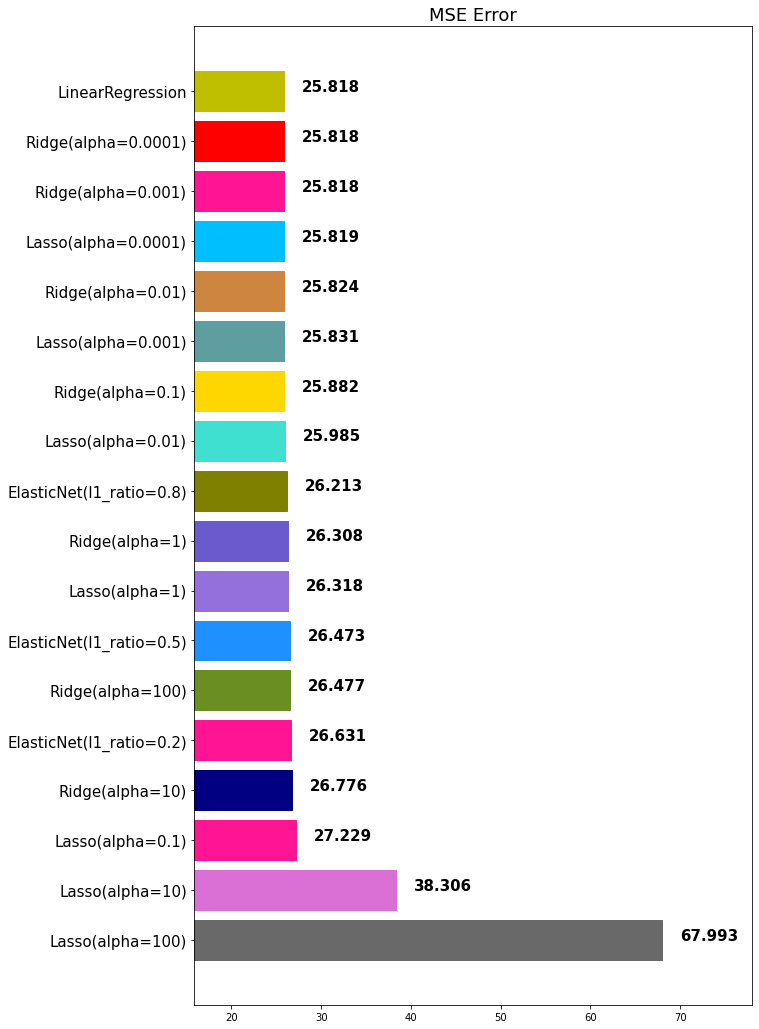

In [53]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha = 0.5, l1_ratio = ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [54]:
elsticnet_20 = ElasticNet(alpha = 5, l1_ratio = ratio)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha = 5, l1_ratio = 0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

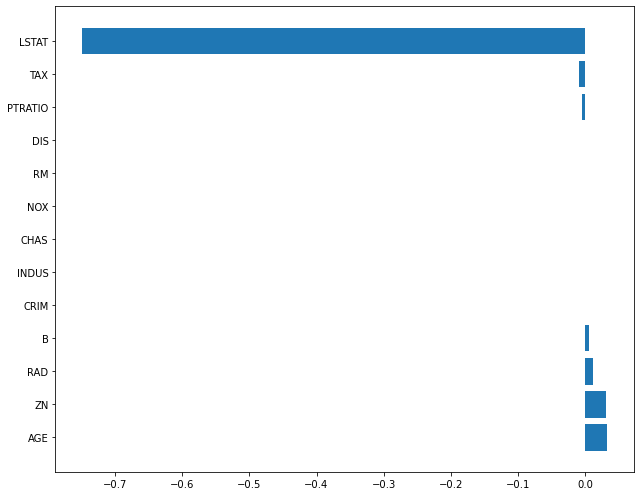

In [55]:
plot_coef(x_train.columns, elsticnet_20.coef_)

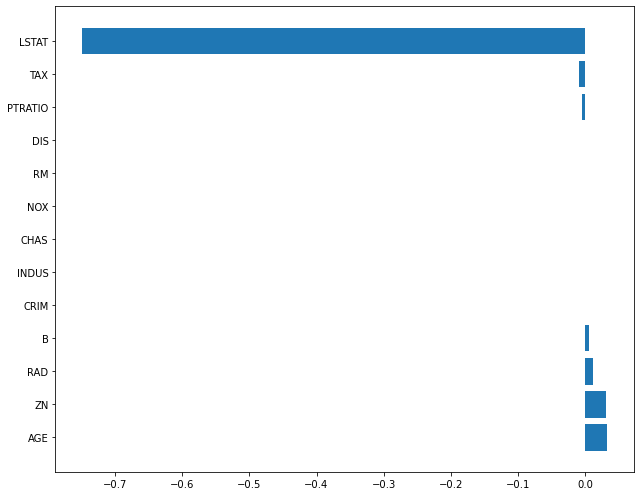

In [56]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [57]:
elsticnet_80.coef_

array([-0.        ,  0.03138366, -0.        ,  0.        ,  0.        ,
        0.        ,  0.0327152 , -0.        ,  0.01066803, -0.00894765,
       -0.00438333,  0.00478111, -0.74943405])